Dataset Link: https://www.kaggle.com/datasets/adityasharma01/snake-dataset-india

About Dataset
This is the image dataset of various snake species found in India. The dataset is classified into train and test previously and then to Non-Venomous and Venomous. It contains images of cobras to vipers to rat snake and green tree vine.
The size of every image is 400×400.

Code Reference: https://www.kaggle.com/code/hitzz97/emotion-detection/notebook

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, LeakyReLU, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

In [ ]:
train_path = "/content/drive/MyDrive/Feynn Labs- ML INtern/project 3/Snake Images/test"
test_path = "/content/drive/MyDrive/Feynn Labs- ML INtern/project 3/Snake Images/train"

In [ ]:
x = plt.imread("/content/drive/MyDrive/Feynn Labs- ML INtern/project 3/Snake Images/train/Venomous/king-cobra-head1.jpg") #to load an image
x.shape #To get the shape of the loaded image

(400, 400, 3)

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)
#Generate batches of tensor image data with real-time data augmentation.

Created an ImageDataGenerator object from the tf.keras.preprocessing.image module. This generator is used to apply various data augmentation techniques and preprocessing to images before feeding them into a neural network for training. In this case, you've specified the rescale argument as 1/255., which means you are scaling the pixel values of the images by dividing them by 255. This rescaling typically normalizes the pixel values to the range [0, 1], which is a common preprocessing step for neural networks when working with image data.

In [ ]:
train = datagen.flow_from_directory(train_path,target_size=(48,48),class_mode="sparse", seed=1, color_mode="grayscale", batch_size=128)
test = datagen.flow_from_directory(test_path,target_size=(48,48),class_mode="sparse", seed=1, color_mode="grayscale", batch_size=128)

Found 269 images belonging to 2 classes.
Found 1783 images belonging to 2 classes.


In [ ]:
dir(train)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_filepaths',
 '_flow_index',
 '_get_batches_of_transformed_samples',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_set_index_array',
 'allowed_class_modes',
 'batch_index',
 'batch_size',
 'class_indices',
 'class_mode',
 'classes',
 'color_mode',
 'data_format',
 'directory',
 'dtype',
 'filenames',
 'filepaths',
 'image_data_generator',
 'image_shape',
 'index_array',
 'index_generator',
 'interpolation',
 'keep_aspect_ratio',
 'labels',
 'lock',
 'n',
 'next',
 'num_classes',
 'on_epoch_end',
 'reset',
 'sample_weight',
 'samples',
 'save_format',
 'save_prefix',

In [ ]:
print(train.class_indices)
venom_dict = {0: "Non-Venomous", 1: "Venomous"}

{'Non Venomous': 0, 'Venomous': 1}


'Non Venomous' images are assigned the class label 0, and 'Venomous' images are assigned the class label 1

In [ ]:
x, y = train.next()
#The next() function returns the next item in an iterator.
print(x.shape, y.shape)
train.reset()

(128, 48, 48, 1) (128,)


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), input_shape=(48,48,1),padding="same"),
    LeakyReLU(),
    Conv2D(32, (3,3), padding="same"),
    LeakyReLU(),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.2),

    Conv2D(64,(3,3),padding="same"),
    LeakyReLU(),
    Conv2D(64,(3,3), padding="same"),
    LeakyReLU(),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),

    Conv2D(128,(3,3),padding="same"),
    LeakyReLU(),
    Conv2D(128,(3,3), padding="same"),
    LeakyReLU(),
    Conv2D(128,(3,3), padding="same"),
    LeakyReLU(),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.4),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(len(train.class_indices), activation="softmax")
])
model.summary()
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 48, 48, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                     

Conv2D is the layer to convolve the image into multiple images
Activation is the activation function.
MaxPooling2D is used to max pool the value from the given size matrix and same is used for the next 2 layers. then, Flatten is used to flatten the dimensions of the image obtained after convolving it.
Dense is used to make this a fully connected model and is the hidden layer.
Dropout is used to avoid overfitting on the dataset.
Dense is the output layer contains only one neuron which decide to which category image belongs.

In [ ]:
net = Sequential(name='DCNN')

net.add(
    Conv2D(
        filters=64,
        kernel_size=(5,5),
        input_shape=(48, 48, 1),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_1'
    )
)
net.add(BatchNormalization(name='batchnorm_1'))
net.add(
    Conv2D(
        filters=64,
        kernel_size=(5,5),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_2'
    )
)
net.add(BatchNormalization(name='batchnorm_2'))

net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_1'))
net.add(Dropout(0.4, name='dropout_1'))

net.add(
    Conv2D(
        filters=128,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_3'
    )
)
net.add(BatchNormalization(name='batchnorm_3'))
net.add(
    Conv2D(
        filters=128,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_4'
    )
)
net.add(BatchNormalization(name='batchnorm_4'))

net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_2'))
net.add(Dropout(0.4, name='dropout_2'))

net.add(
    Conv2D(
        filters=256,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_5'
    )
)
net.add(BatchNormalization(name='batchnorm_5'))
net.add(
    Conv2D(
        filters=256,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_6'
    )
)
net.add(BatchNormalization(name='batchnorm_6'))

net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_3'))
net.add(Dropout(0.5, name='dropout_3'))

net.add(Flatten(name='flatten'))

net.add(
    Dense(
        128,
        activation='elu',
        kernel_initializer='he_normal',
        name='dense_1'
    )
)
net.add(BatchNormalization(name='batchnorm_7'))

net.add(Dropout(0.6, name='dropout_4'))

net.add(
    Dense(
        7,
        activation='softmax',
        name='out_layer'
    )
)

net.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

net.summary()

Model: "DCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        1664      
                                                                 
 batchnorm_1 (BatchNormaliz  (None, 48, 48, 64)        256       
 ation)                                                          
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batchnorm_2 (BatchNormaliz  (None, 48, 48, 64)        256       
 ation)                                                          
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0      

In [ ]:
#compiling your Keras model with the Adam optimizer, sparse categorical cross-entropy loss, and accuracy as the evaluation metric
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

 callback functions, EarlyStopping and ReduceLROnPlateau, which can be used during model training to improve training efficiency and prevent overfitting

In [ ]:
model.fit(train, validation_data=test, callbacks=callbacks)

3/3 [==============================] - 1577s 754s/step - loss: 1.7493 - accuracy: 0.4721 - val_loss: 0.6928 - val_accuracy: 0.5418 - lr: 1.0000e-04


using the model.fit method to train model using the training and validation datasets (train and test) and have specified the previously defined callbacks (early_stopping and lr_scheduler) for monitoring and controlling the training process.

In [ ]:
#The calculation of accuracy should be based on the total number of samples in the batch
x, y = test.next()
preds = model.predict(x)
idx = np.argmax(preds, axis=1)

# Calculate accuracy based on the total number of samples in the batch
accuracy = np.sum((y == idx) * 1) / len(y)

print('Accuracy:', accuracy)

4/4 [==============================] - 0s 4ms/step
Accuracy: 0.5078125


To visualize a grid of 49 images with their corresponding titles based on model predictions and ground truth labels. The titles are colored green for correct predictions and red for incorrect predictions.

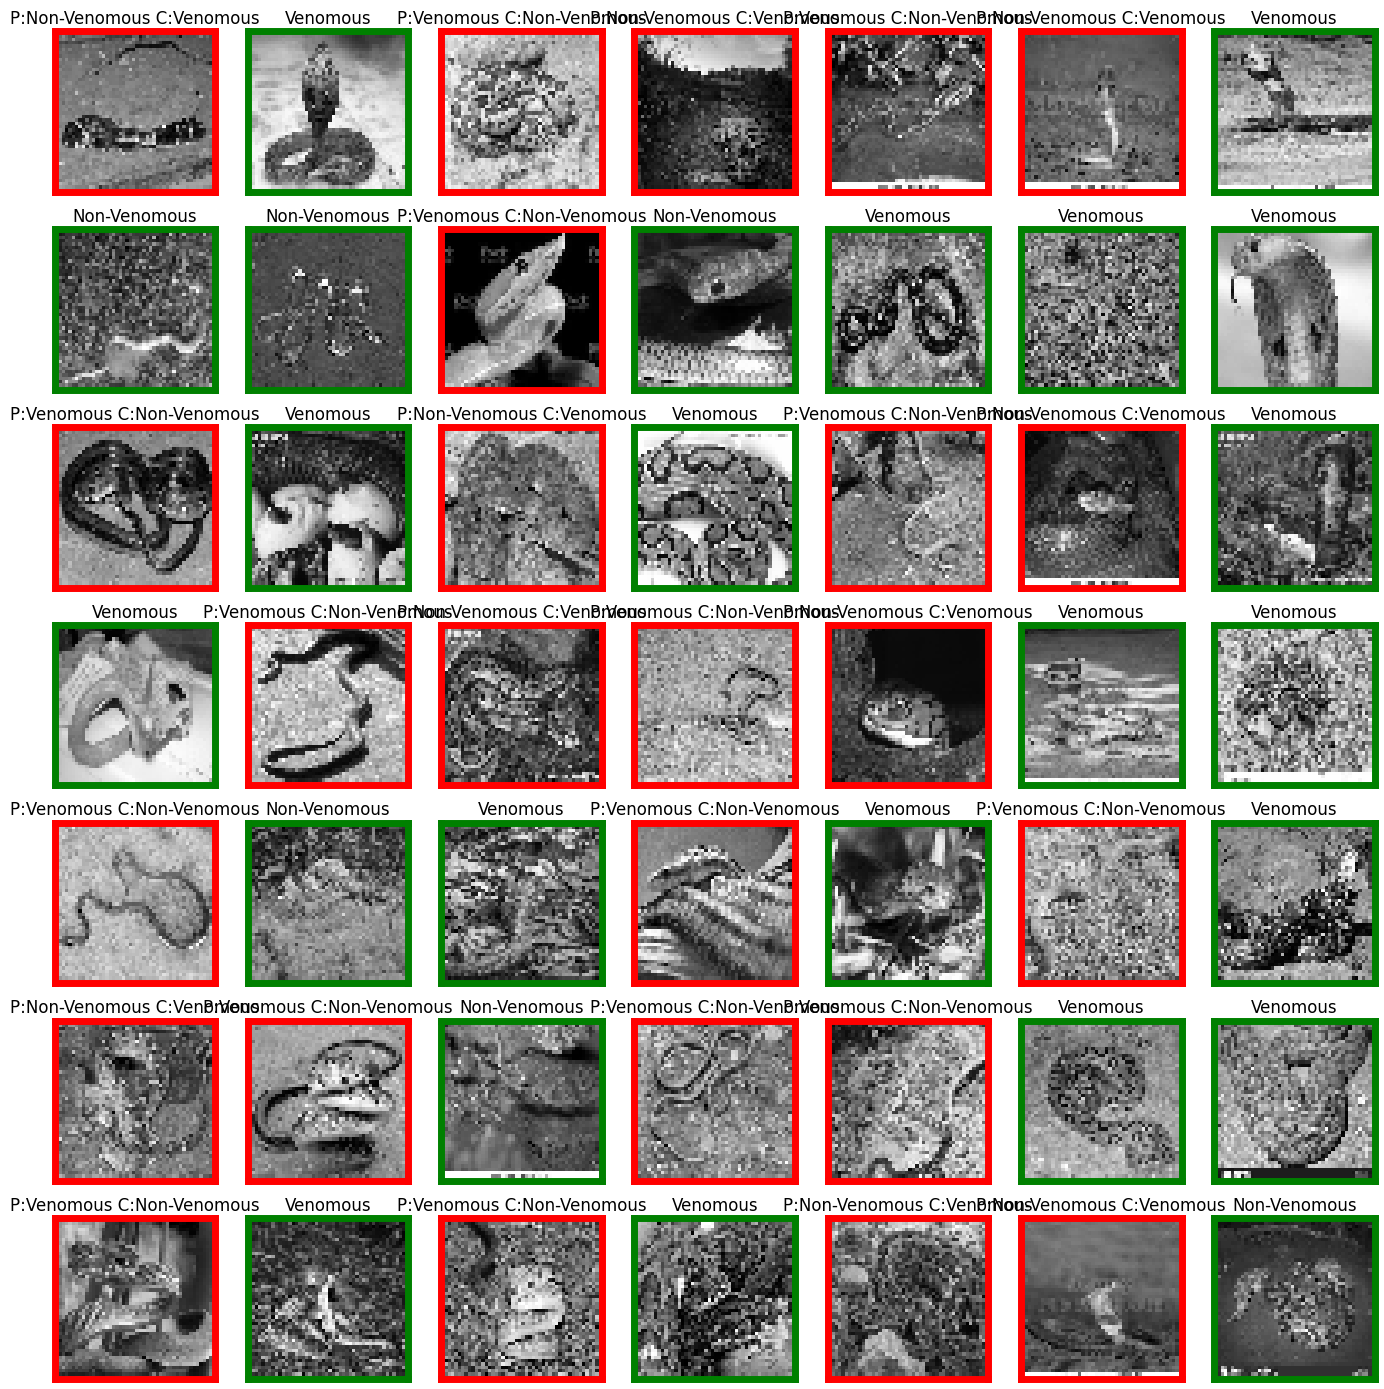

In [ ]:
 fig = plt.figure(1, (14, 14))


k = 0
for j in range(49):
    px = x[j]
    k += 1
    ax = plt.subplot(7, 7, k)

    ax.imshow(px, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])

    if  venom_dict[y[j]] == venom_dict[idx[j]]:
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(5)
            ax.spines[axis].set_color('green')
        ax.set_title(venom_dict[idx[j]])

    else:
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(5)
            ax.spines[axis].set_color('red')
        ax.set_title('P:'+venom_dict[idx[j]]+" C:"+venom_dict[y[j]])
    plt.tight_layout()